In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

2025-07-22 02:57:17.112574: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-07-22 02:57:17.226765: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-22 02:57:17.254777: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.2.3) or chardet (3.0.4) doesn't match a supporte

In [2]:
mnist=tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train=tf.expand_dims(x_train, axis=-1)
x_test=tf.expand_dims(x_test, axis=-1)

2025-07-22 02:57:20.597556: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-07-22 02:57:21.043551: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22294 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:17:00.0, compute capability: 8.6


In [5]:
x_train.shape

TensorShape([60000, 28, 28, 1])

In [6]:
x_train=tf.image.resize(x_train,(299,299))
x_test=tf.image.resize(x_test,(299,299))

In [7]:
x_train.shape

TensorShape([60000, 299, 299, 1])

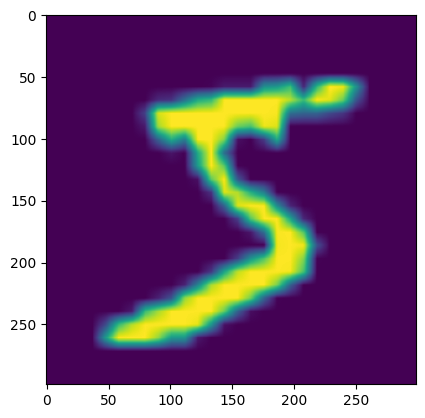

In [8]:
plt.imshow(x_train[0])

In [9]:
import tensorflow as tf

class Inceptionv2_module1(tf.keras.layers.Layer):
    def __init__(self, filter1, filter2, filter3, filter4, filter5, filter6, filter7):
        super().__init__()
        
        # 1x1 conv => 추가된 경로 : 더 다양한 특징 추출에 기여함
        self.conv1 = tf.keras.layers.Conv2D(filters=filter1, kernel_size=(1,1), strides=1, padding='same')
        self.conv1_bn = tf.keras.layers.BatchNormalization()
        self.conv1_relu = tf.keras.layers.Activation('relu')
        
        # 5x5 conv: 1x1 conv -> 3x3 conv -> 3x3 conv
        self.conv2 = tf.keras.layers.Conv2D(filters=filter2, kernel_size=(1,1), strides=1, padding='same')
        self.conv2_bn = tf.keras.layers.BatchNormalization()
        self.conv2_relu = tf.keras.layers.Activation('relu')
        
        self.conv2_1 = tf.keras.layers.Conv2D(filters=filter3, kernel_size=(3,3), strides=1, padding='same')
        self.conv2_1_bn = tf.keras.layers.BatchNormalization()
        self.conv2_1_relu = tf.keras.layers.Activation('relu')
        
        self.conv2_2 = tf.keras.layers.Conv2D(filters=filter4, kernel_size=(3,3), strides=1, padding='same')
        self.conv2_2_bn = tf.keras.layers.BatchNormalization()
        self.conv2_2_relu = tf.keras.layers.Activation('relu')
        
        # 3x3 conv: 1x1 conv -> 3x3 conv
        self.conv3 = tf.keras.layers.Conv2D(filters=filter5, kernel_size=(1,1), strides=1, padding='same')
        self.conv3_bn = tf.keras.layers.BatchNormalization()
        self.conv3_relu = tf.keras.layers.Activation('relu')
        
        self.conv3_1 = tf.keras.layers.Conv2D(filters=filter6, kernel_size=(3,3), strides=1, padding='same')
        self.conv3_1_bn = tf.keras.layers.BatchNormalization()
        self.conv3_1_relu = tf.keras.layers.Activation('relu')
                
        # maxpooling -> 1x1 conv
        self.pool = tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=1, padding='same')
        self.conv = tf.keras.layers.Conv2D(filters=filter7, kernel_size=(1,1), strides=1, padding='same')
        self.conv_bn = tf.keras.layers.BatchNormalization()
        self.conv_relu = tf.keras.layers.Activation('relu')
        
    def call(self, inputs):
        # 1x1 conv -> 3x3 -> 3x3 conv
        x_1 = self.conv2(inputs)
        x_1 = self.conv2_bn(x_1)
        x_1 = self.conv2_relu(x_1)
        
        x_1 = self.conv2_1(x_1)
        x_1 = self.conv2_1_bn(x_1)
        x_1 = self.conv2_1_relu(x_1)
        
        x_1 = self.conv2_2(x_1)
        x_1 = self.conv2_2_bn(x_1)
        x_1 = self.conv2_2_relu(x_1)
        
        # 1x1 conv -> 3x3 conv
        x_2 = self.conv3(inputs)
        x_2 = self.conv3_bn(x_2)
        x_2 = self.conv3_relu(x_2)
        
        x_2 = self.conv3_1(x_2)
        x_2 = self.conv3_1_bn(x_2)
        x_2 = self.conv3_1_relu(x_2)
        
        # maxpool -> 1x1 conv
        x_3 = self.pool(inputs)
        x_3 = self.conv(x_3)
        x_3 = self.conv_bn(x_3)
        x_3 = self.conv_relu(x_3)
        
        # 1x1 conv
        x_4 = self.conv1(inputs)
        x_4 = self.conv1_bn(x_4)
        x_4 = self.conv1_relu(x_4)
        
        output = tf.keras.layers.concatenate([x_1, x_2, x_3, x_4])
        
        return output

In [10]:
import tensorflow as tf

class Inceptionv2_module2(tf.keras.layers.Layer):
    def __init__(self, filter1, filter1_1, filter1_2, filter1_3, filter1_4, filter2, filter2_1, filter2_2, filter3, filter4):
        super().__init__()
        
        # 1x1 conv -> 1x7 conv -> 7x1 conv -> 1x7 conv -> 7x1 conv
        self.conv1 = tf.keras.layers.Conv2D(filters=filter1, kernel_size=(1,1), strides=1, padding='same')
        self.conv1_bn = tf.keras.layers.BatchNormalization()
        self.conv1_relu = tf.keras.layers.Activation('relu')
        
        self.conv1_1 = tf.keras.layers.Conv2D(filters=filter1_1, kernel_size=(1,7), strides=1, padding='same')
        self.conv1_1_bn = tf.keras.layers.BatchNormalization()
        self.conv1_1_relu = tf.keras.layers.Activation('relu')
        
        self.conv1_2 = tf.keras.layers.Conv2D(filters=filter1_2, kernel_size=(7,1), strides=1, padding='same')
        self.conv1_2_bn = tf.keras.layers.BatchNormalization()
        self.conv1_2_relu = tf.keras.layers.Activation('relu')
        
        self.conv1_3 = tf.keras.layers.Conv2D(filters=filter1_3, kernel_size=(1,7), strides=1, padding='same')
        self.conv1_3_bn = tf.keras.layers.BatchNormalization()
        self.conv1_3_relu = tf.keras.layers.Activation('relu')
        
        self.conv1_4 = tf.keras.layers.Conv2D(filters=filter1_4, kernel_size=(7,1), strides=1, padding='same')
        self.conv1_4_bn = tf.keras.layers.BatchNormalization()
        self.conv1_4_relu = tf.keras.layers.Activation('relu')
        
        # 1x1 conv -> 1x7 conv -> 7x1 conv
        self.conv2 = tf.keras.layers.Conv2D(filters=filter2, kernel_size=(1,1), strides=1, padding='same')
        self.conv2_bn = tf.keras.layers.BatchNormalization()
        self.conv2_relu = tf.keras.layers.Activation('relu')

        self.conv2_1 = tf.keras.layers.Conv2D(filters=filter2_1, kernel_size=(1,7), strides=1, padding='same')
        self.conv2_1_bn = tf.keras.layers.BatchNormalization()
        self.conv2_1_relu = tf.keras.layers.Activation('relu')
        
        self.conv2_2 = tf.keras.layers.Conv2D(filters=filter2_2, kernel_size=(7,1), strides=1, padding='same')
        self.conv2_2_bn = tf.keras.layers.BatchNormalization()
        self.conv2_2_relu = tf.keras.layers.Activation('relu')
                
        # maxpool -> 1x1 conv
        self.pool = tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=1, padding='same')
        self.conv = tf.keras.layers.Conv2D(filters=filter3, kernel_size=(1,1), strides=1, padding='same')
        self.conv_bn = tf.keras.layers.BatchNormalization()
        self.conv_relu = tf.keras.layers.Activation('relu')
        
        # 1x1 conv
        self.conv3 = tf.keras.layers.Conv2D(filters=filter4, kernel_size=(1,1), strides=1, padding='same')
        self.conv3_bn = tf.keras.layers.BatchNormalization()
        self.conv3_relu = tf.keras.layers.Activation('relu')
                                                
    def call(self, inputs):
        # 1x1 -> 1xn -> nx1 -> 1xn -> nx1
        x_1 = self.conv1(inputs)
        x_1 = self.conv1_bn(x_1)
        x_1 = self.conv1_relu(x_1)
        
        x_1 = self.conv1_1(x_1)
        x_1 = self.conv1_1_bn(x_1)
        x_1 = self.conv1_1_relu(x_1)

        x_1 = self.conv1_2(x_1)
        x_1 = self.conv1_2_bn(x_1)
        x_1 = self.conv1_2_relu(x_1)

        x_1 = self.conv1_3(x_1)
        x_1 = self.conv1_3_bn(x_1)
        x_1 = self.conv1_3_relu(x_1)

        x_1 = self.conv1_4(x_1)
        x_1 = self.conv1_4_bn(x_1)
        x_1 = self.conv1_4_relu(x_1)
        
        # 1x1 -> 1xn -> nx1
        x_2 = self.conv2(inputs)
        x_2 = self.conv2_bn(x_2)
        x_2 = self.conv2_relu(x_2)

        x_2 = self.conv2_1(x_2)
        x_2 = self.conv2_1_bn(x_2)
        x_2 = self.conv2_1_relu(x_2)

        x_2 = self.conv2_2(x_2)
        x_2 = self.conv2_2_bn(x_2)
        x_2 = self.conv2_2_relu(x_2)
        
        # maxpool -> 1x1 conv
        x_3 = self.pool(inputs)
        x_3 = self.conv(x_3)
        x_3 = self.conv_bn(x_3)
        x_3 = self.conv_relu(x_3)
        
        # 1x1 conv
        x_4 = self.conv3(inputs)
        x_4 = self.conv3_bn(x_4)
        x_4 = self.conv3_relu(x_4)
        
        output = tf.keras.layers.concatenate([x_1, x_2, x_3, x_4])
        
        return output

In [11]:
class Inceptionv2_module3(tf.keras.layers.Layer):
    def __init__(self, filter1, filter1_1, filter1_2, filter1_3, filter2, filter2_1, filter2_2, filter3, filter4):
        super().__init__()
        
        # 1x1 conv -> 3x3 conv -> 1x3, 3x1
        self.conv1 = tf.keras.layers.Conv2D(filters=filter1, kernel_size=(1,1), strides=1, padding='same')
        self.bn1 = tf.keras.layers.BatchNormalization()
        self.relu1 = tf.keras.layers.Activation('relu')
        
        self.conv1_1 = tf.keras.layers.Conv2D(filters=filter1_1, kernel_size=(3,3), strides=1, padding='same')
        self.bn1_1 = tf.keras.layers.BatchNormalization()
        self.relu1_1 = tf.keras.layers.Activation('relu')
        
        
        self.conv1_2 = tf.keras.layers.Conv2D(filters=filter1_2, kernel_size=(1,3), strides=1, padding='same')
        self.bn1_2 = tf.keras.layers.BatchNormalization()
        self.relu1_2 = tf.keras.layers.Activation('relu')
        
        
        self.conv1_3 = tf.keras.layers.Conv2D(filters=filter1_3, kernel_size=(3,1), strides=1, padding='same')
        self.bn1_3 = tf.keras.layers.BatchNormalization()
        self.relu1_3 = tf.keras.layers.Activation('relu')
        
        # 1x1 conv -> 1x3 conv, 3x1 conv
        self.conv2 = tf.keras.layers.Conv2D(filters=filter2, kernel_size=(1,1), strides=1, padding='same')
        self.bn2 = tf.keras.layers.BatchNormalization()
        self.relu2 = tf.keras.layers.Activation('relu')
        
        self.conv2_1 = tf.keras.layers.Conv2D(filters=filter2_1, kernel_size=(1,3), strides=1, padding='same')
        self.bn2_1 = tf.keras.layers.BatchNormalization()
        self.relu2_1 = tf.keras.layers.Activation('relu')
        
        self.conv2_2 = tf.keras.layers.Conv2D(filters=filter2_2, kernel_size=(3,1), strides=1, padding='same')
        self.bn2_2 = tf.keras.layers.BatchNormalization()
        self.relu2_2 = tf.keras.layers.Activation('relu')
        
        
        # maxpool -> 1x1 conv
        self.pool = tf.keras.layers.MaxPool2D(pool_size=(3,3),
                                              strides=1,
                                              padding='same')
        
        self.conv_pool = tf.keras.layers.Conv2D(filters=filter3, kernel_size=(1,1), strides=1, padding='same')
        self.bn_pool = tf.keras.layers.BatchNormalization()
        self.relu_pool = tf.keras.layers.Activation('relu')
        
        
        # 1x1 conv
        self.conv4 = tf.keras.layers.Conv2D(filters=filter4, kernel_size=(1,1), strides=1, padding='same')
        self.bn4 = tf.keras.layers.BatchNormalization()
        self.relu4 = tf.keras.layers.Activation('relu')
        
        
    def call(self, inputs):
        
        # 1x1 -> 3x3 -> 1x3, 3x1
        x1_base = self.conv1(inputs)
        x1_base = self.bn1(x1_base)
        x1_base = self.relu1(x1_base)
        
        x1_base = self.conv1_1(x1_base)
        x1_base = self.bn1_1(x1_base)
        x1_base = self.relu1_1(x1_base)
        
        # 1x1 -> 1x3, 3x1 
        x1_a = self.conv1_2(x1_base)
        x1_a = self.bn1_2(x1_a)
        x1_a = self.relu1_2(x1_a)
        
        x1_b = self.conv1_3(x1_base)
        x1_b = self.bn1_3(x1_b)
        x1_b = self.relu1_3(x1_b)
        
        # 1x1 conv -> 1x3 conv, 3x1 conv
        x2_base = self.conv2(inputs)
        x2_base = self.bn2(x2_base)
        x2_base = self.relu2(x2_base)
        
        x2_a = self.conv2_1(x2_base)
        x2_a = self.bn2_1(x2_a)
        x2_a = self.relu2_1(x2_a)
        
        x2_b = self.conv2_2(x2_base)
        x2_b = self.bn2_2(x2_b)
        x2_b = self.relu2_2(x2_b)
        
        # maxpool -> 1x1 conv
        x3 = self.pool(inputs)
        x3 = self.conv_pool(x3)
        x3 = self.bn_pool(x3)
        x3 = self.relu_pool(x3)
        
        # 1x1 conv
        x4 = self.conv4(inputs)
        x4 = self.bn4(x4)
        x4 = self.relu4(x4)
        
        
        output = tf.keras.layers.concatenate([x1_a, x1_b, x2_a, x2_b, x3, x4])
        
        
        return output

In [12]:
class Grid_reduction_module(tf.keras.layers.Layer):
    def __init__(self, filter1, filter2, filter3, filter4, filter5):
        super().__init__()
        
        # 1x1 conv -> 3x3 conv (stride 1) -> 3x3 conv (stride 2)
        self.conv1 = tf.keras.layers.Conv2D(filters=filter1,
                                           kernel_size=(1,1),
                                           strides=1,
                                           padding='same')
        self.bn1 = tf.keras.layers.BatchNormalization()
        self.act1 = tf.keras.layers.Activation('relu')
        
        self.conv1_1 = tf.keras.layers.Conv2D(filters=filter2,
                                              kernel_size=(3,3),
                                              strides=1,
                                              padding='same',
                                              # activation='relu'
                                             )
        self.bn1_1 = tf.keras.layers.BatchNormalization()
        self.act1_1 = tf.keras.layers.Activation('relu')
        
        self.conv1_2 = tf.keras.layers.Conv2D(filters=filter3,
                                              kernel_size=(3,3),
                                              strides=2,
                                              # padding='same',
                                              # activation='relu'
                                             )
        self.bn1_2 = tf.keras.layers.BatchNormalization()
        self.act1_2 = tf.keras.layers.Activation('relu')
        
        # 1x1 conv -> 3x3 conv (stride 2)
        self.conv2 = tf.keras.layers.Conv2D(filters=filter4,
                                            kernel_size=(1,1),
                                            strides=1,
                                            padding='same',
                                            activation='relu')
        self.bn2 = tf.keras.layers.BatchNormalization()
        self.act2 = tf.keras.layers.Activation('relu')
        
        self.conv2_1 = tf.keras.layers.Conv2D(filters=filter5,
                                              kernel_size=(3,3),
                                              strides=2,
                                              # padding='same',
                                              activation='relu')
        self.bn2_1 = tf.keras.layers.BatchNormalization()
        self.act2_1 = tf.keras.layers.Activation('relu')
        
        # maxpool (stride 2)
        self.pool = tf.keras.layers.MaxPool2D(pool_size=(3,3),
                                              strides=2)
                                              # padding='same')
        
    def call(self, inputs):
        x_1=self.conv1(inputs)
        x_1=self.bn1(x_1)
        x_1=self.act1(x_1)
        
        x_1=self.conv1_1(x_1)
        x_1=self.bn1_1(x_1)
        x_1=self.act1_1(x_1)
        
        x_1=self.conv1_2(x_1)
        x_1=self.bn1_2(x_1)
        x_1=self.act1_2(x_1)
        
        x_2=self.conv2(inputs)
        x_2=self.bn2(x_2)
        x_2=self.act2(x_2)
        
        x_2=self.conv2_1(x_2)
        x_2=self.bn2_1(x_2)
        x_2=self.act2_1(x_2)
        
        x_3=self.pool(inputs)
        
        output=tf.keras.layers.concatenate([x_1, x_2, x_3])
        
        return output

In [13]:
inputs=tf.keras.layers.Input((299,299,1))

x=inputs
x=tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=2)(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Activation('relu')(x)
x=tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=1)(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Activation('relu')(x)
x=tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=1, padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Activation('relu')(x)

x=tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=2)(x)

x=tf.keras.layers.Conv2D(filters=80, kernel_size=(3,3), strides=1)(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Activation('relu')(x)
x=tf.keras.layers.Conv2D(filters=192, kernel_size=(3,3), strides=2)(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Activation('relu')(x)
x=tf.keras.layers.Conv2D(filters=288, kernel_size=(3,3), strides=1, padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Activation('relu')(x)

for _ in range(3):
    x = Inceptionv2_module1(64, 64, 96, 96, 48, 64, 64)(x)

x = Grid_reduction_module(64, 96, 96, 192, 384)(x)

for _ in range(5):
    x=Inceptionv2_module2(160,160,160,160,192,160, 160, 192, 192, 192)(x)

x = Grid_reduction_module(192, 192, 192, 192, 320)(x)
    
for _ in range(2):
    x=Inceptionv2_module3(448,384,384,384,384,384,384,192,320)(x)

x=tf.keras.layers.GlobalAveragePooling2D()(x)
output=tf.keras.layers.Dense(10, activation='softmax')(x)

model=tf.keras.Model(inputs=inputs, outputs=output)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 299, 299, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 149, 149, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 149, 149, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 149, 149, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 147, 147, 32)     128       
 hNormalization)                                             

In [15]:
# model_ = tf.keras.applications.InceptionV3()

In [16]:
# model_.summary()

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
model.fit(x_train, y_train, batch_size=8, epochs=10)

Epoch 1/10


2025-07-22 02:57:59.468085: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2025-07-22 02:58:01.150721: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


7500/7500 [==============================] - 388s 50ms/step - loss: 0.1909 - sparse_categorical_accuracy: 0.9441
Epoch 2/10
5884/7500 [======================>.......] - ETA: 1:22 - loss: 0.0863 - sparse_categorical_accuracy: 0.9743

In [ ]:
model.evaluate(x_test,y_test)